# A validated Taylor integration example: $\dot{x}=x^2$

Here, we will integrate the ODE $\dot{x}=x^2$, using `ValidatedNumerics.jl`:

In [1]:
#this is not commutative: if I try:
#    using ValidatedNumerics, TaylorIntegration
#then the integration crashes

using TaylorIntegration, ValidatedNumerics

#for plotting:
using Plots
pyplot()

Plots.PyPlotBackend()

The initial conditions, and some integration parameters:

In [25]:
#note that we have mixed types: Interval{Float64}, Int64, Float64...
x0 = @interval 3; t0 = 0; tmax = @interval 0.333333; abstol = 1e-10; order=25
x0, t0, tmax, abstol

([3, 3],0,[0.333332, 0.333334],1.0e-10)

The maximum time, `tmax`, is rigorously below the singularity:

In [4]:
tmax < 1/3

true

The ODE we're trying to integrate:

In [5]:
f(t, x) = x.^2

f (generic function with 1 method)

Perform a validated Taylor integration:

In [26]:
@time tT, xT = taylorinteg(f, x0, t0, 0.001, order, abstol, maxsteps=500); #warmup lap
@time tT, xT = taylorinteg(f, x0, t0, tmax, order, abstol, maxsteps=500);

  0.005742 seconds (39.65 k allocations: 1.207 MB)
  0.147729 seconds (892.85 k allocations: 26.852 MB, 18.47% gc time)


How many steps did the integrator take?

In [8]:
length(tT), length(xT)

(45,45)

Is the last step rigorously below $1/3$?

In [9]:
tT[end]<1/3

true

YES!

Now, we will compare our numerical solution, to the analytical solution:

In [10]:
 exactsol(t, x0) = x0./(1.0-x0.*t)

exactsol (generic function with 1 method)

At the end of the integration, we are enclosing the analytical solution, although perhaps the error is relatively high:

In [11]:
exactsol(tT[end], xT[1])-xT[end]

[-41.8023, 69.9602]

Is the analytical solution, at time `tT[end]`, rigorously contained in `xT[end]`?

In [12]:
exactsol(tT[end], xT[1]) ∈ xT[end]

true

YES!

We are now interested in plotting our validated solution:

In [14]:
tT_hi = map(x->x.hi, tT)
tT_lo = map(x->x.lo, tT)
xT_hi = map(x->x.hi, xT)
xT_lo = map(x->x.lo, xT);

In [16]:
ts = [log10(tT_lo[2:end]), log10(tT_hi[2:end])]
ys = [log10(xT_lo[2:end]), log10(xT_hi[2:end])];

Plot $x_\mathrm{lo}$ vs $t_\mathrm{lo}$ and $x_\mathrm{hi}$ vs $t_\mathrm{hi}$


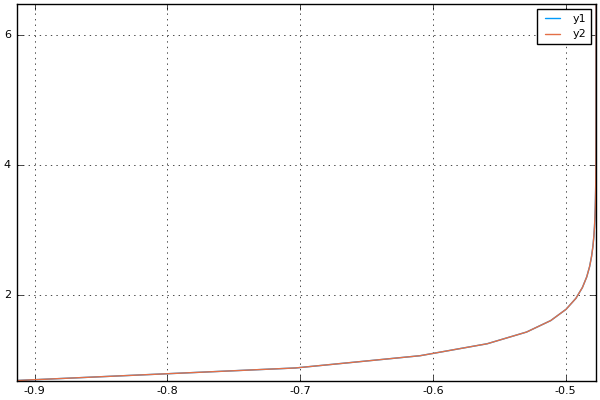

In [19]:
plot(ts, ys)

## A multi-dimensional validated Taylor integration:

Here, we will integrate once again the ODE $\dot{x}=x^2$, but using an array of intervals as the initial condition. Our aim is to use the `taylorinteg` method which corresponds to multi-dimensional ODEs:

In [20]:
q02 = @interval 3 # the initial condition as an interval
x02 = [q02, q02] # the initial condition as an array of intervals
t02 = 0 # the initial time
tmax2 = 0.333333 # the final time
abstol2 = 1e-20 # the absolute (local) tolerance
order2 = 25 # the order of the Taylor expansion

25

The ODE is the same:

In [23]:
@time tT2, xT2 = taylorinteg(f, x02, t02, 0.001, order2, abstol2, maxsteps=500); #warmup lap
@time tT2, xT2 = taylorinteg(f, x02, t02, tmax2, order2, abstol2, maxsteps=500);

  0.011435 seconds (79.55 k allocations: 2.418 MB)
  0.740708 seconds (5.06 M allocations: 152.380 MB, 12.92% gc time)


For each component, is the analytical solution rigorously contained in the numerical solution?

In [28]:
exactsol(tT2[end], xT2[1,1]) ∈ xT2[end,1], exactsol(tT2[end], xT2[1,2]) ∈ xT2[end,2]

(true,true)

YES!!!!!!!

## A multi-dimensional validated integration, with extended precision:

Here, we will test the use of `BigFloats` with `TaylorIntegration.jl`. Note that here, `x03` is an `Array{Interval{Float64}}`, `t03` is an `Int64`, `tmax3` is a `BigFloat`, and `abstol3` is a `Float64`. The absolute tolerance `abstol3` is chosen so that `abstol3` $\approx 10^{-3}$ `eps(BigFloat)` $\approx 10^{-80}$, and `order3` will be chosen so that `order3` $\approx -0.5\log($ `eps(BigFloat)` $)$ $\approx 88$ (Jorba & Zou, 2005).

In [42]:
q03 = @interval 3 # the initial condition as a interval: Interval{Float64}
x03 = [q03, q03] # the initial condition as an array of intervals: Array{Interval{Float64}}
t03 = 0 # the initial time: Int64
tmax3 = BigFloat(0.333333) # the final time: BigFloat
abstol3 = 1e-80 # the absolute (local) tolerance: Float64
order3 = 90 # the order of the Taylor expansion: Int64

90

The ODE is the same:

Once again, we integrate:

In [43]:
@time tT3, xT3 = taylorinteg(f, x03, t03, BigFloat(0.001), order3, abstol3, maxsteps=500); #warmup lap
@time tT3, xT3 = taylorinteg(f, x03, t03, tmax3, order3, abstol3, maxsteps=500);

  0.842325 seconds (8.10 M allocations: 329.752 MB, 31.51% gc time)
 50.991677 seconds (461.44 M allocations: 18.355 GB, 33.20% gc time)


Is the final time less than $1/3$?

In [44]:
tT3[end] < 1/3

true

YES!!!!!!!

How many steps did the Taylor integrator perform?

In [45]:
length(tT3), length(xT3[:,1]), length(xT3[:,2])

(114,114,114)

For each component, is the analytical solution rigorously contained in our validated solution?

In [46]:
exactsol(tT3[end], xT3[1,1]) ∈ xT3[end,1], exactsol(tT3[end], xT3[1,2]) ∈ xT3[end,2]

(true,true)

YES!!!!

What is the radius of the enclosing intervals?

In [50]:
radius(xT3[end,1]), radius(xT3[end,2])

(5.680700231345338420790774078362109301040435921707687232711698988215210593764779e-59,5.680700231345338420790774078362109301040435921707687232711698988215210593764779e-59)

Up until $t \in [0.333332, 0.333334]$, our numerical solution stays within $\sim 10^{-58}$ of the analytical solution!